# ALPro tests
This notebook is designed to document some simple tests of axion propagation problems to build inuition (and also test the code). First let's import modules and provide some constants for converting to natural units and back.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import constants as c
import alpro 
UNIT_TIME  = 1519252268630104.8
UNIT_LENGTH= 50676.79373667135
UNIT_MASS  = 5.6095363761802584e+32
UNIT_GAUSS = 0.06925147467360344
HBAR_EV = 6.582119569e-16

In [2]:
#this our energy array in units of eV
energy = np.logspace(3,6,1000)

# set parameters of problem
B = 1e-5          # 10 micro G
g = 1e-9 * 1e-9   # 1e-8 GeV^-1
mass = 1e-12      # 1e-12 eV
L = 10.0          # 10 kpc
ne = 0.1          # 1 particle cm^-3 (sets plasma frequency)

### Discretisation Test
In our first test, we compare the result from 1 uniform cell of size L to 10 uniform cells of size L/10. This should give an identical result. We use a pure polarisation state {0,1,0} and a B-field aligned with the x axis. 

Text(0.5, 1.0, 'Discretisation Test')

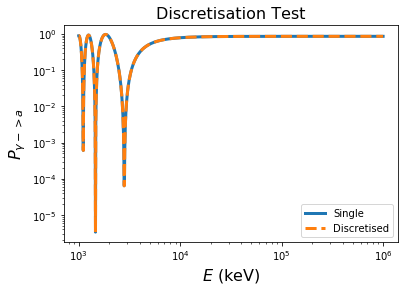

In [3]:
# initialise 
Ainit = np.zeros( (len(energy),6))
Ainit[:,2] = 1.0
phi = np.zeros_like(energy)
# get single probability and plot
P1, Anew = alpro.get_P(energy, Ainit, phi, B, L, g, mass, ne)
plt.plot(energy, P1, c="C0", lw=3, label="Single")
plt.loglog()



Ainit = np.zeros( (len(energy),6))
Ainit[:,2] = 1.0
Anew = Ainit
phi = np.zeros_like(energy)
Nshells = 10
for i in range(Nshells):
    Ainit = Anew
    P1, Anew = alpro.get_P(energy, Ainit, phi, B, L/Nshells, g, mass, ne)

plt.plot(energy, P1, c="C1", ls="--", lw=3, label="Discretised")

# label
plt.legend()
plt.xlabel("$E$ (keV)", fontsize=16)
plt.ylabel("$P_{\gamma->a}$", fontsize=16)
plt.title("Discretisation Test", fontsize=16)

### Flip Test
Now, we do the same as the above, but flip the field alternately in every cell by $\pi$ radians. This means the field goes from having this structure: $\rightarrow \rightarrow \rightarrow \rightarrow$ to this $\rightarrow \leftarrow \rightarrow \leftarrow$. My intuition was that this should give the same result - but it does not! Note that it does give the same result if **every** cell has been rotated by $\pi$. 

Text(0.5, 1.0, 'Flip Test')

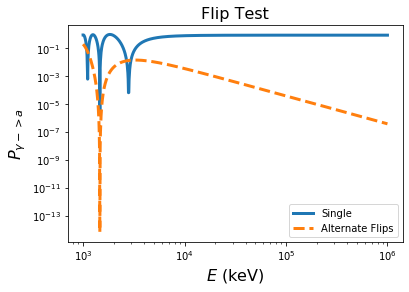

In [4]:
Ainit = np.zeros( (len(energy),6))
Ainit[:,2] = 1.0
phi = np.pi/2 * np.ones_like(energy) * 0.0
P1, Anew = alpro.get_P(energy, Ainit, phi, B, L, g, mass, ne)
# P2, Anew2 = alpro.get_P(energy, Ainit2, phi - np.pi/2, B, L, g, mass, ne)

# P = P2
plt.plot(energy, P1, c="C0", lw=3, label="Single")
plt.loglog()
# plt.ylim(0,1.2)
Nshells = 10

Ainit = np.zeros( (len(energy),6))
Ainit[:,2] = 1.0
Anew = Ainit
phi = np.pi/2 * np.ones_like(energy) * 0.0
for i in range(Nshells):
    # this give alternating 0 and pi.
    offset = 0.5 * (1 + ((-1.0) ** (i))) * np.pi
    Ainit = Anew
    P1, Anew = alpro.get_P(energy, Ainit, phi + offset, B, L/Nshells, g, mass, ne)
    
plt.plot(energy, P1, c="C1", ls="--", lw=3, label="Alternate Flips")

# label
plt.legend()
plt.xlabel("$E$ (keV)", fontsize=16)
plt.ylabel("$P_{\gamma->a}$", fontsize=16)
plt.title("Flip Test", fontsize=16)

### Test v Marsh / Libanov
This tests a uniform field model from Libanov and Troitsky against David Marsh's code and from data digitised from the Libanov paper

In [5]:
import test_subroutines as test
P = test.run_marsh_test(energy, 1e-9 * 1e-9, 1e-11)


In [ ]:
np.random.seed(12)
energy = np.logspace(3,6,5000)

# Now let's randomise orders 
Nshells = 100
Ainit1 = np.zeros( (len(energy),6))
Ainit1[:,2] = 1.0
Ainit2 = np.zeros( (len(energy),6))
Ainit2[:,0] = 1.0

for i in range(Nshells):
    # this give alternating 0 and pi.
    phi = np.random.random() * np.ones_like(energy)
    P1, Anew1 = alpro.get_P(energy, Ainit, phi, B, L/Nshells, g, mass, ne)
    P2, Anew2 = alpro.get_P(energy, Ainit, phi + np.pi/2, B, L/Nshells, g, mass, ne)
    Ainit1 = Anew1
    Ainit2 = Anew2
        
    P = 0.5 * (P1 + P2)

plt.plot(energy, 1-P, lw=3, alpha=1)  

#pp = 1-(np.ones_like(energy) * 1.0 / 3.0 * (1.0 - np.exp(-3.0 * P * Nshells / 2.0)))
plt.plot(energy, pp)
plt.loglog()

In [ ]:
np.random.seed(12)
# Now let's randomise orders 
Nshells = 3
phi = np.random.random(Nshells)

for tries in range(3):
    # shuffle order of fields
    #np.random.shuffle(phi)
    print (phi)
    
    Ainit1 = np.zeros( (len(energy),6))
    Ainit1[:,2] = 1.0
    Ainit2 = np.zeros( (len(energy),6))
    Ainit2[:,0] = 1.0
    for i in range(Nshells):
        P1, Anew1 = alpro.get_P(energy, Ainit1, phi, B , L/Nshells, g, mass, ne)
        P2, Anew2 = alpro.get_P(energy, Ainit2, phi - (np.pi/2), B, L/Nshells, g, mass, ne)
        Ainit1 = Anew1
        Ainit2 = Anew2
        
    P = 0.5 * (P1 + P2)
    plt.plot(energy, P, lw=3, alpha=0.5)
    
plt.loglog()